In [121]:
import pandas as pd
import numpy as np
import json
import requests
import pprint 
import random
from datetime import datetime
import seaborn as sns

In [122]:
def TitledPlayers(title):
    url = f"https://api.chess.com/pub/titled/{title}"
    response = requests.request("GET", url)
    return response.json()
gm = TitledPlayers('GM') #Grand Master
im = TitledPlayers('IM') #International Master
fm = TitledPlayers('FM') #FIDE Master
cm = TitledPlayers('CM') #Candidate Master

gmSmall = random.sample(gm['players'], 200)
imSmall = random.sample(im['players'], 200)
fmSmall = random.sample(fm['players'], 200)
cmSmall = random.sample(cm['players'], 200)

titles3 = [gmSmall, imSmall, fmSmall, cmSmall]

In [127]:
#MAIN CELL
start = datetime.now()
data3 = []
userTitle = ''
for title in titles3: #loops through each of the titles (gm, im, fm, cm)
    users = title
    # in the following code block, define which title each player has based on which part of the loop it is in
    if title == titles[0]:
        userTitle = 'gm'
    elif title == titles[1]:
        userTitle = 'im'
    elif title == titles[2]:
        userTitle = 'fm'
    elif title == titles[3]:
        userTitle = 'cm'
    for user in users: #loops through each user in the category
        #hitting chess.com API to get each month that a player has games
        url = f'https://api.chess.com/pub/player/{user}/games/archives'
        response = requests.request("GET", url)
        archives = response.json()
        
        monthurls = archives['archives'][:1]

        gameslist = []
        for url in monthurls: #loop through each month
            response = requests.request("GET", url)
            gameslist.append(response.json())
        white = []
        black = []
#         whiteAccuracy = []
#         blackAccuracy = []
#         accuracy = []
        for gamelist in gameslist: #loop through each list of games
            games = gamelist['games']
            for game in games: #within each list of games, get each game
                if game['white']['username'] == user:
#                     accuracy.append(game['accuracies']['white'])
#                     whiteAccuracy.append(game['accuracies']['white'])
                    if game['white']['result'] == 'win':
                        white.append(1)
                    else:
                        white.append(0)
                else:
#                     accuracy.append(game['accuracies']['black'])
#                     blackAccuracy.append(game['accuracies']['black'])
                    if game['black']['result'] == 'win':
                        black.append(1)
                    else:
                        black.append(0)    
        
        totalGames = white + black
        numGames = len(totalGames)
        winRate = np.mean(totalGames)
#         avgAccuracy = np.mean(accuracy)
        numWhite = len(white)
        whiteRate = np.mean(white)
#         avgWhiteAccuracy = np.mean(whiteAccuracy)
        numBlack = len(black)
        blackRate = np.mean(black)
#         avgBlackAccuracy = np.mean(blackAccuracy)
        
        data2.append([user, userTitle, numGames, winRate, numWhite, whiteRate, numBlack, blackRate])
    
time = datetime.now() - start 
print(time)

C:\Users\GavinHatch\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\GavinHatch\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0:12:37.054860


In [95]:
len(data)

200

In [130]:
len(data2)

943

[]

In [131]:
chess2 = pd.DataFrame(data2, columns=['username', 'title', 'numGames', 'winRate', 'numWhite', 'whiteRate', 'numBlack', 'blackRate'])

In [132]:
chess2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   username   943 non-null    object 
 1   title      943 non-null    object 
 2   numGames   943 non-null    int64  
 3   winRate    913 non-null    float64
 4   numWhite   943 non-null    int64  
 5   whiteRate  294 non-null    float64
 6   numBlack   943 non-null    int64  
 7   blackRate  898 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 59.1+ KB


In [137]:
chess2.to_csv('chess.csv')

In [97]:
chess = pd.DataFrame(data, columns=['username', 'title', 'numGames', 'winRate', 'numWhite', 'whiteRate', 'numBlack', 'blackRate'])

In [98]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   username   200 non-null    object 
 1   title      200 non-null    object 
 2   numGames   200 non-null    int64  
 3   winRate    195 non-null    float64
 4   numWhite   200 non-null    int64  
 5   whiteRate  71 non-null     float64
 6   numBlack   200 non-null    int64  
 7   blackRate  190 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 12.6+ KB


In [136]:
chess2[(chess2['numWhite'] > 0) & (chess2['numBlack'] > 0)]

,username,title,numGames,winRate,numWhite,whiteRate,numBlack,blackRate
2,garcho08,,5,0.800000,2,1.000000,3,0.666667
12,lyndonlistzmendonca,,137,0.620438,70,0.657143,67,0.582090
17,chessathletic,,3,1.000000,2,1.000000,1,1.000000
19,vica56,,20,0.800000,10,0.800000,10,0.800000
21,wudileige,,50,0.500000,25,0.480000,25,0.520000
...,...,...,...,...,...,...,...,...
936,morozcoma,,3,0.666667,1,1.000000,2,0.500000
937,rachidhuilda,,51,0.705882,25,0.600000,26,0.807692
938,tepcovua2007,,19,0.947368,10,0.900000,9,1.000000
939,chanchakman,,11,0.545455,6,0.666667,5,0.400000


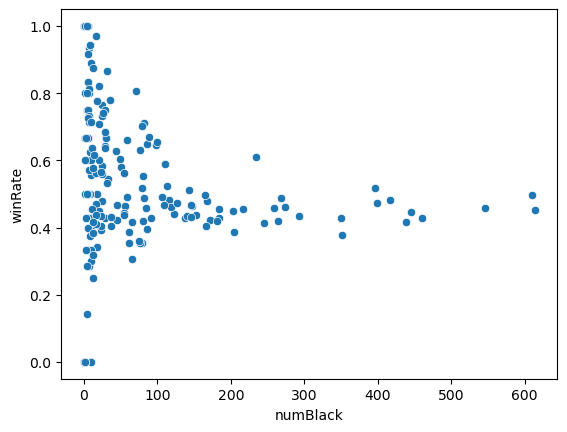

In [113]:
sns.scatterplot(data=chess, x='numBlack', y = 'winRate');
# plt.ylabel('Win Rate')
